In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
titanic = pd.read_csv('titanic2.csv')

In [3]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_category,Fare_category,Title,Family_size
0,0,343,0,2,1,28.0,0,0,248740,13.0000,2,Adult,3,Mr,1
1,1,76,0,3,1,25.0,0,0,348123,7.6500,2,Adult,3,Mr,1
2,2,641,0,3,1,20.0,0,0,350050,7.8542,2,Young,3,Mr,1
3,3,568,0,3,0,29.0,0,4,349909,21.0750,2,Adult,3,Mrs,5
4,4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Adult,2,Mr,2


In [4]:
X = titanic[['Fare_category', 'Sex', 'Pclass', 'Age', 'Family_size']]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
titanic_tree = tree.DecisionTreeClassifier()  
titanic_tree.fit(X_train, y_train)   
y_pred = titanic_tree.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


[Text(594.13557034603, 1057.0, 'Sex <= 0.5\ngini = 0.475\nsamples = 100.0%\nvalue = [0.611, 0.389]'),
 Text(293.6684549356223, 996.6, 'Pclass <= 2.5\ngini = 0.373\nsamples = 35.7%\nvalue = [0.248, 0.752]'),
 Text(68.25321888412017, 936.2, 'Age <= 3.0\ngini = 0.094\nsamples = 19.8%\nvalue = [0.05, 0.95]'),
 Text(28.738197424892704, 875.8, 'Pclass <= 1.5\ngini = 0.5\nsamples = 0.3%\nvalue = [0.5, 0.5]'),
 Text(14.369098712446352, 815.4000000000001, 'gini = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]'),
 Text(43.107296137339056, 815.4000000000001, 'gini = 0.0\nsamples = 0.1%\nvalue = [0.0, 1.0]'),
 Text(107.76824034334764, 875.8, 'Pclass <= 1.5\ngini = 0.083\nsamples = 19.5%\nvalue = [0.043, 0.957]'),
 Text(71.84549356223175, 815.4000000000001, 'Fare_category <= 0.5\ngini = 0.025\nsamples = 11.1%\nvalue = [0.013, 0.987]'),
 Text(57.47639484978541, 755.0, 'Age <= 47.0\ngini = 0.198\nsamples = 1.3%\nvalue = [0.111, 0.889]'),
 Text(43.107296137339056, 694.6, 'gini = 0.0\nsamples = 1.0%\nvalue = 

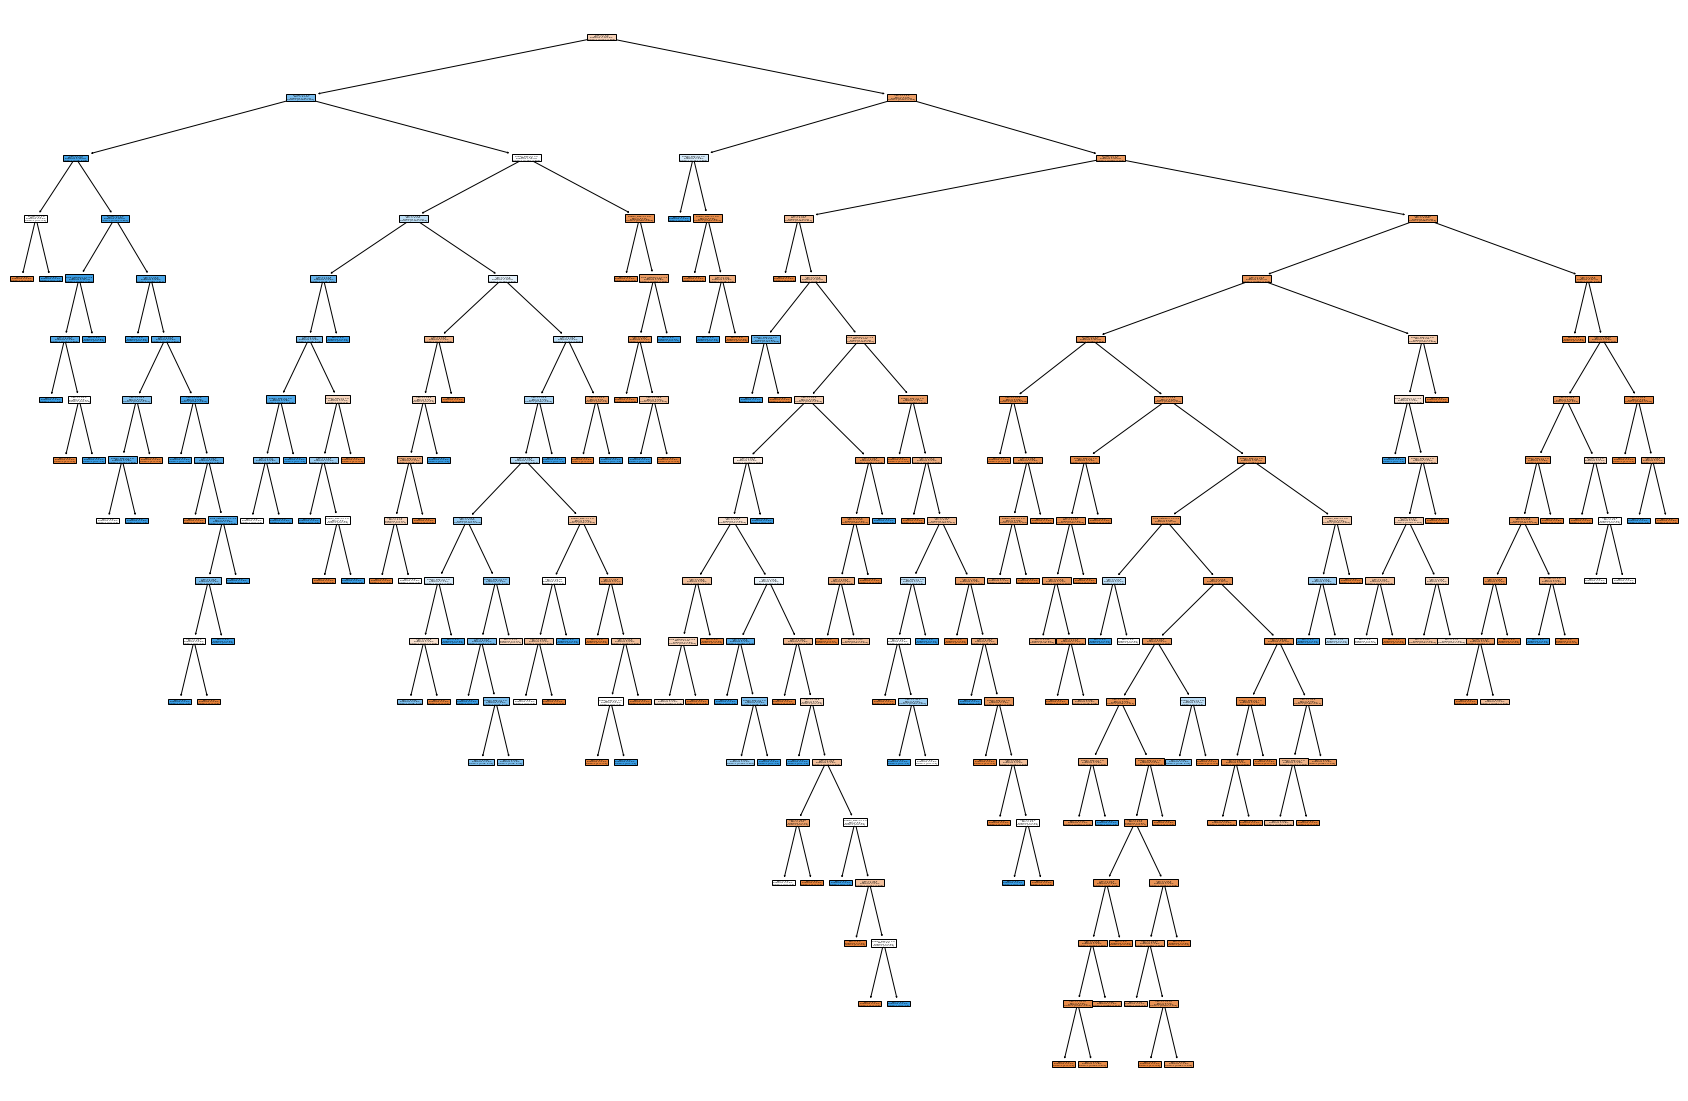

In [6]:
plt.figure(figsize = (30,20))
plot_tree(titanic_tree, filled = True, feature_names = X.columns, proportion = True)

In [7]:
titanic_tree2 = tree.DecisionTreeClassifier(max_leaf_nodes = 5)  
titanic_tree2.fit(X_train, y_train)   
y_pred = titanic_tree2.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


[Text(837.0, 951.3000000000001, 'Sex <= 0.5\ngini = 0.475\nsamples = 100.0%\nvalue = [0.611, 0.389]'),
 Text(418.5, 679.5, 'Pclass <= 2.5\ngini = 0.373\nsamples = 35.7%\nvalue = [0.248, 0.752]'),
 Text(209.25, 407.70000000000005, 'gini = 0.094\nsamples = 19.8%\nvalue = [0.05, 0.95]'),
 Text(627.75, 407.70000000000005, 'Family_size <= 4.5\ngini = 0.5\nsamples = 15.9%\nvalue = [0.496, 0.504]'),
 Text(418.5, 135.89999999999998, 'gini = 0.481\nsamples = 12.9%\nvalue = [0.402, 0.598]'),
 Text(837.0, 135.89999999999998, 'gini = 0.172\nsamples = 2.9%\nvalue = [0.905, 0.095]'),
 Text(1255.5, 679.5, 'Age <= 13.0\ngini = 0.305\nsamples = 64.3%\nvalue = [0.812, 0.188]'),
 Text(1046.25, 407.70000000000005, 'gini = 0.494\nsamples = 3.8%\nvalue = [0.444, 0.556]'),
 Text(1464.75, 407.70000000000005, 'gini = 0.275\nsamples = 60.5%\nvalue = [0.835, 0.165]')]

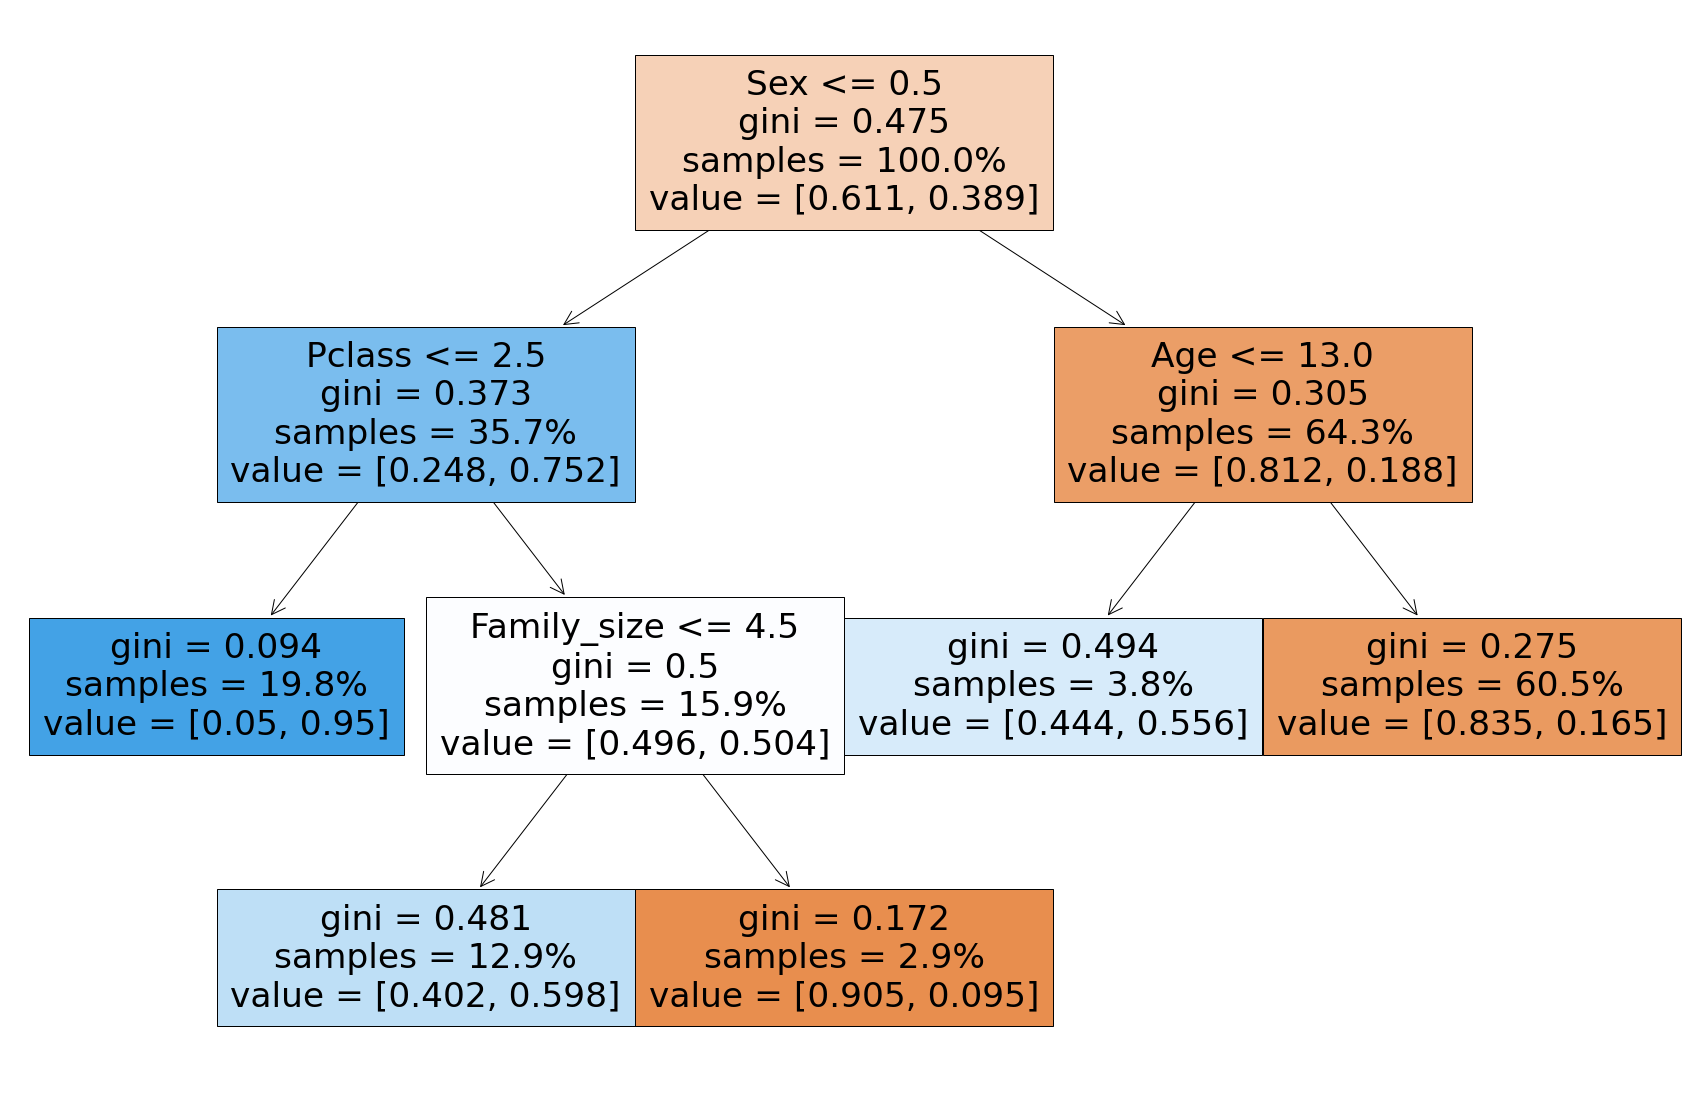

In [8]:
plt.figure(figsize = (30,20))
plot_tree(titanic_tree2, filled = True, feature_names = X.columns, proportion = True)

In [9]:
titanic_tree3 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf = 5, max_leaf_nodes = 10, max_depth=8)  
titanic_tree3.fit(X_train, y_train)   
y_pred = titanic_tree3.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8268156424581006


[Text(708.2307692307693, 996.6, 'Sex <= 0.5\nentropy = 0.964\nsamples = 100.0%\nvalue = [0.611, 0.389]'),
 Text(257.53846153846155, 815.4000000000001, 'Pclass <= 2.5\nentropy = 0.808\nsamples = 35.7%\nvalue = [0.248, 0.752]'),
 Text(128.76923076923077, 634.2, 'entropy = 0.285\nsamples = 19.8%\nvalue = [0.05, 0.95]'),
 Text(386.3076923076923, 634.2, 'Family_size <= 4.5\nentropy = 1.0\nsamples = 15.9%\nvalue = [0.496, 0.504]'),
 Text(257.53846153846155, 453.0, 'Age <= 7.0\nentropy = 0.972\nsamples = 12.9%\nvalue = [0.402, 0.598]'),
 Text(128.76923076923077, 271.79999999999995, 'entropy = 0.439\nsamples = 1.5%\nvalue = [0.091, 0.909]'),
 Text(386.3076923076923, 271.79999999999995, 'entropy = 0.991\nsamples = 11.4%\nvalue = [0.444, 0.556]'),
 Text(515.0769230769231, 453.0, 'entropy = 0.454\nsamples = 2.9%\nvalue = [0.905, 0.095]'),
 Text(1158.923076923077, 815.4000000000001, 'Age <= 13.0\nentropy = 0.697\nsamples = 64.3%\nvalue = [0.812, 0.188]'),
 Text(901.3846153846155, 634.2, 'Family_si

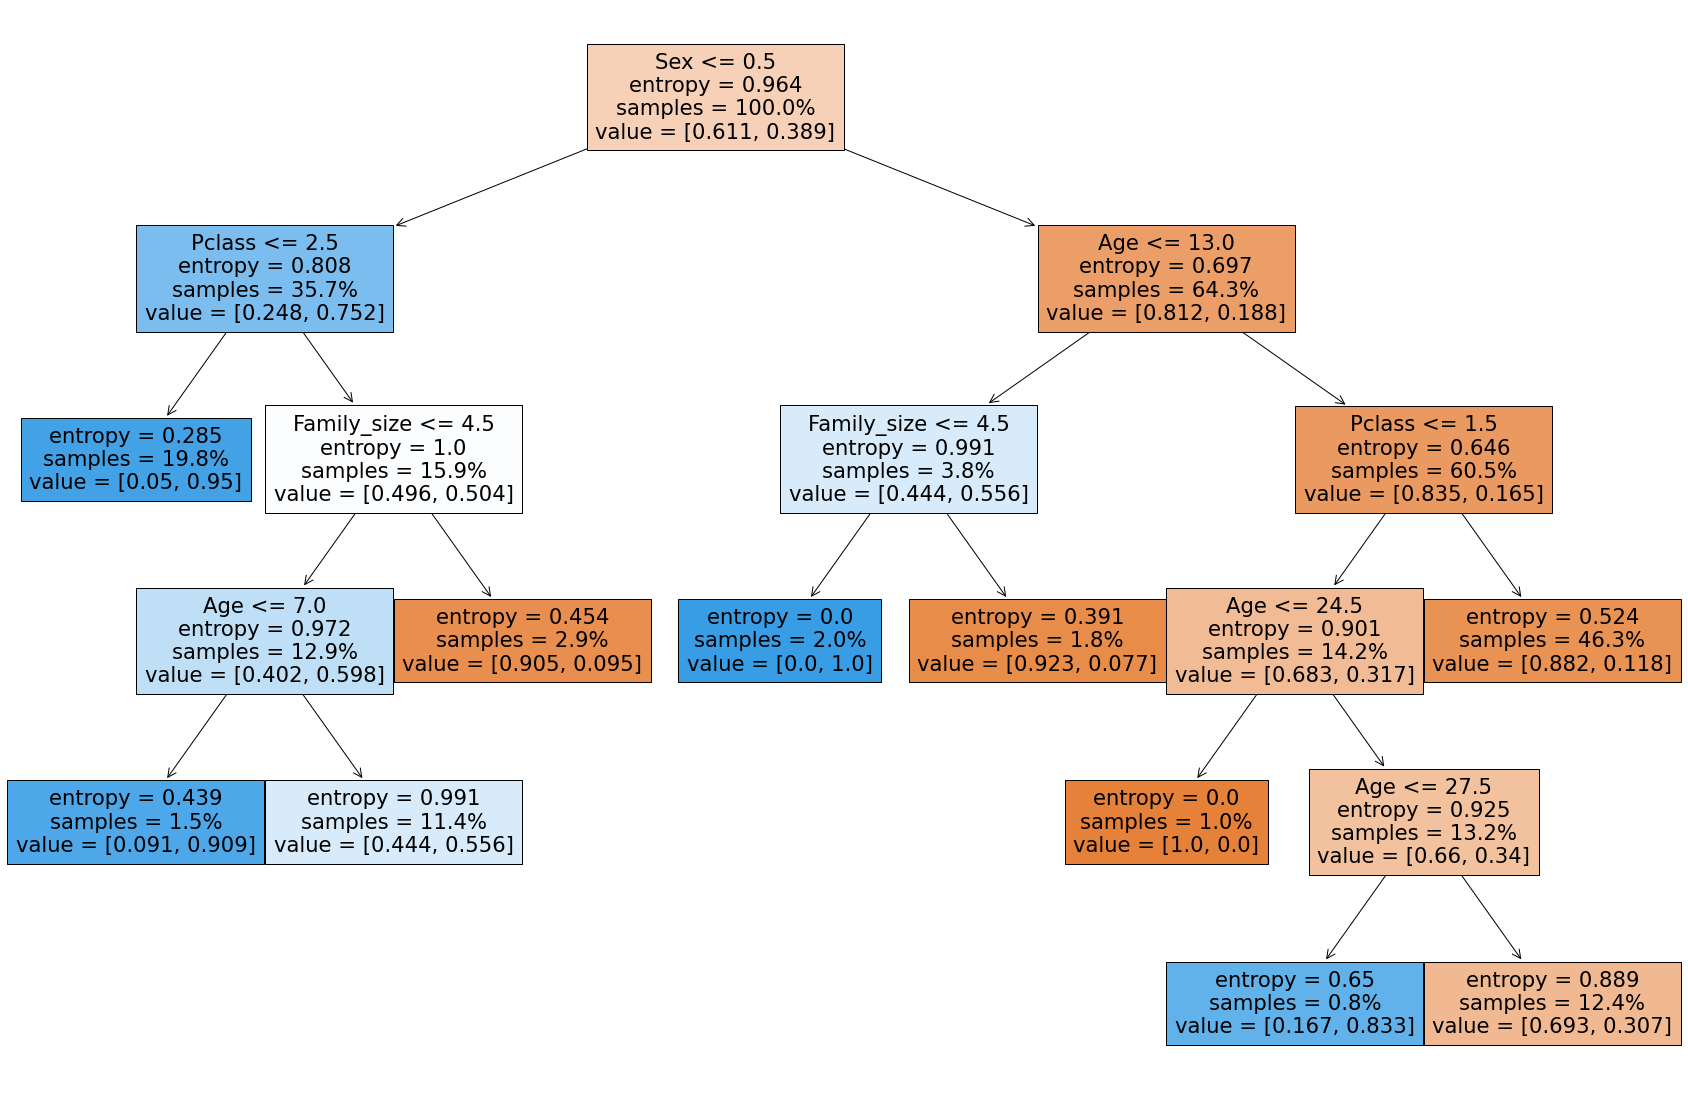

In [10]:
plt.figure(figsize = (30,20))
plot_tree(titanic_tree3, filled = True, feature_names = X.columns, proportion = True)

This last model has a greater accuracy rate than the previous one (0.827 > 0.804)

In [26]:
titanic_random_forest = RandomForestClassifier(n_estimators=100)  
titanic_random_forest.fit(X_train, y_train)  
y_pred = titanic_random_forest.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8100558659217877


In [30]:
titanic_random_forest = RandomForestClassifier(n_estimators=500)  
titanic_random_forest.fit(X_train, y_train)  
y_pred = titanic_random_forest.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8212290502793296


In [29]:
titanic_random_forest = RandomForestClassifier(n_estimators=1000, min_samples_split=4, criterion='entropy')  
titanic_random_forest.fit(X_train, y_train)  
y_pred = titanic_random_forest.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.8212290502793296
